## [Evaluation Metrics for Binary Classification](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers)

<div style="background-color: #FFC; border: 2px solid #AAA; border-radius: 10px; padding: 15px">
A classifier's behavior can be analyzed in detail using a <a href="https://en.wikipedia.org/wiki/Confusion_matrix">confusion matrix</a>. It requires both the predicted and true labels of a dataset and shows the number of instances where the true label is A and the predicted label is B, for all combinations of (A, B). The rows of the matrix represent true labels, while the columns represent predicted labels. For binary classification, the confusion matrix is a 2×2 table that includes <b>TN</b> (true negatives), <b>FP</b> (false positives), <b>FN</b> (false negatives), and <b>TP</b> (true positives).
</div>

<table style="border: 1px dotted">
  <thead>
    <tr>
      <th></th>
      <th>Predicted Negative</th>
      <th>Predicted Positive</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Actual Negative</th>
      <td style="text-align: center">TN</td>
      <td style="text-align: center">FP</td>
    </tr>
    <tr>
      <th>Actual Positive</th>
      <td style="text-align: center">FN</td>
      <td style="text-align: center">TP</td>
    </tr>
  </tbody>
</table>

<img src="../_img/bin_class_metrics_v3.jpg" width="600px" style="border: 1px dotted"/>

**Exercise 1**: The file [ctg_data.txt](../_data/ctg_data.txt) contains data about [cardiotocographic](https://en.wikipedia.org/wiki/Cardiotocography) examinations. See [ctg_names.txt](../_data/ctg_names.txt) for more details. Build a classifier that estimates if the value of the NSP column is 1 (meaning "normal") or not! Use 5-fold cross-validation for evaluation! Measure the accuracy, balanced accuracy, precision, recall, and F1-score of the trained model!

In [1]:
# Load data.
import pandas as pd
df = pd.read_csv('ctg_data.txt')
df = df.sample(len(df), random_state=42) # permute rows
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
282,133,0.002,0.010,0.003,0.002,0.0,0.000,46,1.1,0,...,95,164,5,0,139,135,138,9,0,1
1999,125,0.000,0.001,0.009,0.008,0.0,0.000,62,1.7,0,...,68,140,5,0,130,116,125,29,1,1
1709,131,0.004,0.003,0.004,0.005,0.0,0.001,60,2.1,0,...,78,168,8,0,133,127,132,21,0,1
988,131,0.011,0.000,0.005,0.000,0.0,0.000,29,1.3,0,...,82,171,8,0,143,145,145,9,1,1
2018,125,0.000,0.000,0.008,0.007,0.0,0.001,64,1.3,0,...,78,155,4,0,114,111,114,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,130,0.009,0.001,0.004,0.001,0.0,0.000,52,1.3,0,...,73,172,6,0,144,141,144,16,1,1
1095,123,0.012,0.000,0.002,0.000,0.0,0.000,22,2.2,0,...,100,152,2,0,131,132,133,4,0,1
1130,122,0.005,0.000,0.004,0.005,0.0,0.000,20,2.6,0,...,60,158,6,0,131,121,126,31,0,1
1294,115,0.003,0.000,0.008,0.002,0.0,0.001,24,1.6,0,...,71,179,3,2,133,122,129,45,0,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 282 to 860
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
AC,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
FM,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
UC,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
DL,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
DS,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
DP,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
ASTV,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
MSTV,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
ALTV,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [4]:
df['NSP'].value_counts()

1    1655
2     295
3     176
Name: NSP, dtype: int64

In [5]:
X = df[df.columns[:-1]].values           # input matrix
y = (df['NSP'] > 1).astype('int').values # target vector

In [6]:
# standardize input matrix
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

X.shape, y.shape, y.mean()

((2126, 21), (2126,), 0.2215428033866416)

In [7]:
# use another way
# Build a classifier that estimates if the value of the NSP column is 1 (meaning "normal") or not! Use 70%-30% train-test split 
# for evaluation! Measure the accuracy, balanced accuracy, precision, recall, and F1-score of the trained model!

# generate train-test split
from sklearn.model_selection import ShuffleSplit

def gen_split(X):
     return next(ShuffleSplit(test_size=0.3).split(X)) # (the data is already permuted)

tr, te = gen_split(X)
tr.shape, te.shape

((1488,), (638,))

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

def evaluate(cl, X, y):
    tr, te = gen_split(X)
    cl.fit(X[tr], y[tr])
    yhat = cl.predict(X)
    return {
        'acc': accuracy_score(y[te], yhat[te]),
        'bal_acc': balanced_accuracy_score(y[te], yhat[te]),
        'prec': precision_score(y[te], yhat[te]),
        'rec': recall_score(y[te], yhat[te]),
        'f1': f1_score(y[te], yhat[te])
    }

In [9]:
evaluate(GradientBoostingClassifier(random_state=42), X, y)

{'acc': 0.9435736677115988,
 'bal_acc': 0.9050544288359907,
 'prec': 0.88,
 'rec': 0.8396946564885496,
 'f1': 0.859375}

In [10]:
evaluate(LogisticRegression(), X, y)

{'acc': 0.8949843260188087,
 'bal_acc': 0.8377366609294321,
 'prec': 0.7744360902255639,
 'rec': 0.7357142857142858,
 'f1': 0.7545787545787546}

In [11]:
# Build a classifier that estimates if the value of the NSP column is 1 (meaning "normal") or not! Use 5-fold cross-validation 
#for evaluation! Measure the accuracy, balanced accuracy, precision, recall, and F1-score of the trained model!
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cv = StratifiedKFold(5, shuffle=True, random_state=42) # splitter object

In [12]:
cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=cv, scoring='balanced_accuracy').mean()

0.8587890372585705

In [13]:
cross_val_score(GradientBoostingClassifier(random_state=42), X, y, cv=cv, scoring='balanced_accuracy').mean()

0.9158635307172605

**Exercise 2**: Prepare the confusion matrix of the trained model! Compute accuracy, balanced accuracy, precision, recall and F1-score from the elements of the confusion matrix!

In [14]:
from sklearn.metrics import confusion_matrix

cl = GradientBoostingClassifier(max_depth=4, random_state=42)
cl.fit(X[tr], y[tr])
yhat = cl.predict(X)
(tn, fp), (fn, tp) = confusion_matrix(y[te], yhat[te])

In [15]:
tn, fp, fn, tp

(483, 7, 19, 129)

In [16]:
p = tp + fn # total number of actual positives
n = tn + fp # total number of actual negatives
print('accuracy:', (tp + tn) / (p + n))
print('balanced accuracy:', ((tp / p) + (tn / n)) / 2)
prec = tp / (tp + fp)
print('precision:', prec)
rec = tp / p
print('recall:', rec)
print('f1:', 2 / (1 / prec + 1 / rec))

accuracy: 0.9592476489028213
balanced accuracy: 0.9286679536679536
precision: 0.9485294117647058
recall: 0.8716216216216216
f1: 0.908450704225352


**Exercise 3**: Optimize the decision threshold of the trained model in terms of the the test F1-score.

In [17]:
import numpy as np
from sklearn.metrics import f1_score

# Predicted probabilities
p = cl.predict_proba(X)[:, 1]

thresholds = np.arange(0, 1.05, 0.05)

best_f1_score = 0
best_threshold = 0


for th in thresholds:
    y_thr = (p >= th).astype(int)
    
    f1 = f1_score(y, y_thr)
    
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = th

print("Best F1-score:", best_f1_score)
print("Best threshold:", best_threshold)


Best F1-score: 0.9671957671957672
Best threshold: 0.35000000000000003


<AxesSubplot: xlabel='th'>

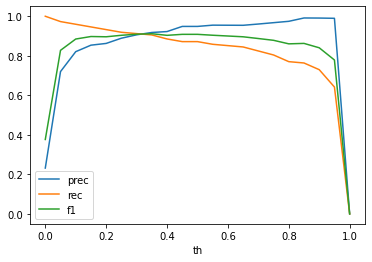

In [18]:
# teacher soloution

import numpy as np

p = cl.predict_proba(X)[:, 1]

data = []
for th in np.arange(0, 1.05, 0.05):
    yhat = (p > th) # probability prediction => label prediction
    data.append({
        'th': th,
        'prec': precision_score(y[te], yhat[te], zero_division=0),
        'rec': recall_score(y[te], yhat[te]),
        'f1': f1_score(y[te], yhat[te])
    })
df2 = pd.DataFrame(data).set_index('th')
df2.plot()

In [19]:
# optimal threshold
df2['f1'].idxmax()

0.35000000000000003

<div style="background-color: #FFC; border: 2px solid #AAA; border-radius: 10px; padding: 15px">
The <a href="https://en.wikipedia.org/wiki/Receiver_operating_characteristic">receiver operating characteristic</a> (ROC) curve is a graphical representation of the performance of a binary classification model.
It plots the true positive rate (TPR) against the false positive rate (FPR) for different thresholds of a classifier.
The ROC curve can help evaluate the trade-off between the classifier's sensitivity (ability to detect positive instances) and specificity (ability to avoid false positives).
The area under the ROC curve (AUC) is a commonly used metric to evaluate the performance of a binary classifier.
It ranges from 0.5 (random guessing) to 1.0 (perfect classification).
</div>




**Exercise 4**: Display the ROC curve corresponding to the trained model! Compute the area under the ROC curve!

In [22]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

cl = GradientBoostingClassifier(n_estimators=200, learning_rate=0.08, max_depth=6, random_state=42)
yprob = cross_val_predict(cl, X, y, cv=cv, method='predict_proba')[:, 1]

fpr, tpr, th = roc_curve(y, yprob)

Text(0.5, 0, 'true positive rate')

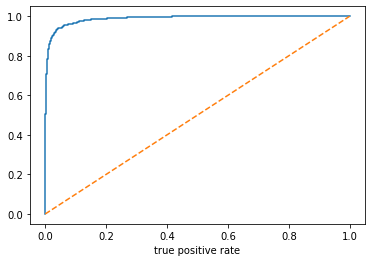

In [25]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('false positive rate')
plt.xlabel('true positive rate')

In [26]:
# area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y, yprob)

0.9880962918775377

_________________________________________________________________________________________________________________________

Text(0.5, 0, 'true positive rate')

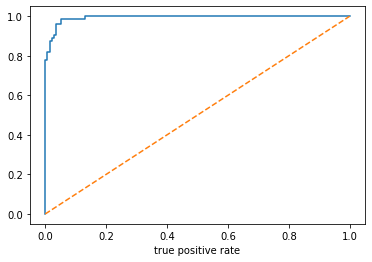

In [28]:
# Train a classifier on the Wisconsin Breast cancer data set,
# and draw its ROC curve!

from sklearn.model_selection import StratifiedShuffleSplit

# Column names.
names = [
    'Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape',
    'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
    'Normal_Nucleoli', 'Mitoses', 'Class'
]
df = pd.read_csv('../_data/wisconsin_data.txt', sep=',', names=names, na_values='?')
df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].mean(), inplace=True)

X = df[names[1:-1]].values      # input matrix
y = df['Class'].values // 2 - 1 # target vector

tr, te = next(StratifiedShuffleSplit(test_size=0.3, random_state=42).split(X, y))
cl = GradientBoostingClassifier(random_state=42)
cl.fit(X[tr], y[tr])
p = cl.predict_proba(X)[:, 1]

fpr, tpr, th = roc_curve(y[te], p[te])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('false positive rate')
plt.xlabel('true positive rate')